In [16]:
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Liczba wszystkich ważnych głosów
liczba_wszystkich_glosow = 19_603_784

In [5]:
# Dane kandydatów
kandydaci = {
    "Trz": 6_147_797, # Rafał Trzaskowski
    "Naw": 5_790_804, # Karol Nawrocki
    "Men": 2_902_448, # Sławomir Mentzen
    "Bra": 1_242_917, # Grzegorz Braun
    "Hol": 978_901, # Szymon Hołownia
    "Zan": 952_832, # Adrian Zandberg
    "Bie": 829_361, # Magdalena Biejat
    "Sta": 243_479, # Krzysztof Stanowski
    "Sen": 214_198, # Joanna Senyszyn
    "Jak": 150_698, # Marek Jakubiak
    "Bar": 95_640, # Artur Bartoszewicz
    "Mac": 36_371, # Maciej Maciak
    "Woc": 18_338, # Marek Woch
}

In [195]:
# Generowanie populacji głosów
lista_glosow = []
for kandydat, liczba_glosow in kandydaci.items():
    lista_glosow.extend([kandydat] * liczba_glosow)

In [161]:
# Sprawdzenie czy wygenerowana lista głosów odpowiada liczbie wszystkich ważnych głosów
assert len(lista_glosow) == liczba_wszystkich_glosow, f"Błąd: {len(lista_glosow)} != {liczba_wszystkich_glosow}"
# Wyświetlenie ilości wygenerowanych głosów
print(len(lista_glosow))

19603784


In [255]:
# Losowanie 50 000 głosów
# Dzięki funkcji sample, każdy głos pojawia się w próbce tylko raz
rozmiar_probki = 100
probka_glosow = random.sample(lista_glosow, rozmiar_probki)

In [256]:
# Liczenie głosów w próbce
licznik_probki = Counter(probka_glosow)
# Wyświetlenie policzonych głosów
print(licznik_probki)

Counter({'Naw': 36, 'Trz': 31, 'Men': 11, 'Bra': 5, 'Zan': 5, 'Bie': 4, 'Hol': 4, 'Jak': 2, 'Bar': 1, 'Sta': 1})


In [257]:
# Sortowanie próbki
posortowana_probka = sorted(licznik_probki.items(), key=lambda x: x[1], reverse=True)

# Rozpakowanie na dwie osobne zmienne
posortowani_kandydaci, posortowane_glosy = zip(*posortowana_probka)

In [258]:
# Liczenie sumy dla przyszłych obliczeń
suma_glosow = sum(posortowane_glosy)

In [259]:
# Wyświetlenie posortowanych danych
print(f"Posortowani kandydaci: {posortowani_kandydaci}")
print(f"Posortowane głosy: {posortowane_glosy}")

Posortowani kandydaci: ('Naw', 'Trz', 'Men', 'Bra', 'Zan', 'Bie', 'Hol', 'Jak', 'Bar', 'Sta')
Posortowane głosy: (36, 31, 11, 5, 5, 4, 4, 2, 1, 1)


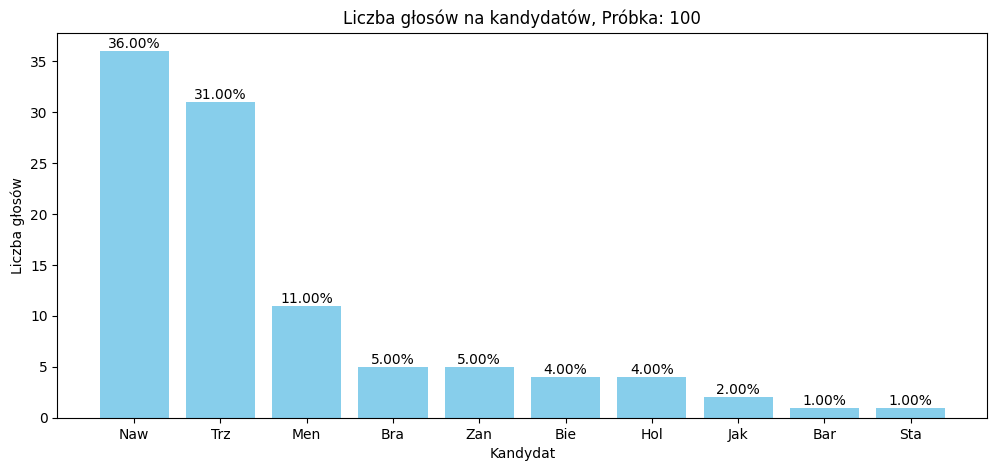

In [260]:
# Tworzenie wykresu słupkowego

# Wysokość, szerokość
plt.figure(figsize=(12, 5))

# Rysowanie wykresu słupkowego i zapisanie obiektów słupków do zmiennej bars
bars = plt.bar(posortowani_kandydaci, posortowane_glosy, color='skyblue')

# Dodanie tytułu wykresu oraz podpisów osi x i y
plt.title(f"Liczba głosów na kandydatów, Próbka: {suma_glosow:,}")
plt.xlabel("Kandydat")
plt.ylabel("Liczba głosów")

# Iteracja jednocześnie po słupkach w obiekcie bars oraz po liczbach głosów w krotce posortowane_glosy
for bar, glosy_kandydata in zip(bars, posortowane_glosy):
    wysokosc = bar.get_height()
    # Obliczenie procentów
    procent = glosy_kandydata / suma_glosow * 100
    # plt.text(x, y, tekst) dodaje tekst do wykresu w punkcie o współrzędnych (x, y)
    plt.text(bar.get_x() + bar.get_width()/2, wysokosc, f"{procent:.2f}%", ha='center', va='bottom')
plt.show()